<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_algebra/task10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy
from sympy import  Matrix, symbols, latex, S, lambdify
from sympy import  sin as Sin
from sympy import  cos as Cos
from sympy import  pi as Pi
from sympy.vector import CoordSys3D, Vector, matrix_to_vector, AxisOrienter, express
from IPython.display import Latex
import pandas as pd
from dataclasses import dataclass, field
import numpy as np
import matplotlib.pyplot as plt

# Практическое занятие 10
# Компьютерный практикум по алгебре на Python
## Векторы
### Задание 1.
Задать систему координат с именем '1'.
Найти скалярное и векторное произведение векторов $a(-\cos(\pi/4), \sin(\pi/3), 1)$ и $b(2, -1, 3)$.

In [4]:
import sympy

N = CoordSys3D('N')

a = -sympy.cos(sympy.pi/4) * N.i + sympy.sin(sympy.pi/3) * N.j + 1 * N.k
b = 2 * N.i - 1 * N.j + 3 * N.k
display(a, b)

display(a.dot(b), a.cross(b))

(-sqrt(2)/2)*N.i + (sqrt(3)/2)*N.j + N.k

2*N.i + (-1)*N.j + 3*N.k

-sqrt(2) - sqrt(3)/2 + 3

(1 + 3*sqrt(3)/2)*N.i + (2 + 3*sqrt(2)/2)*N.j + (-sqrt(3) + sqrt(2)/2)*N.k

### Задание 2
Ввести безымянную систему координат $M$ и символы $\varphi$ и $c$.
Вычислить $5u\cdot(v - u)$ и $((2v + u)\times(v - 3u)) $,

$u = (\cos(\varphi), 2c - 5, \sin(2\varphi))$, $v = (\sin(\varphi), 2c  + 5, \cos(2\varphi))$.

Скалярное произведение обозначено $\cdot$, векторное $\times$.
Использовать  & и ^, скобки расставить как в условии, поскольку приоритет у & и ^ ниже, чем у + и -. Упростить полученное выражение.

In [11]:
phi, c = sympy.symbols('phi c')

M = CoordSys3D("")

u = sympy.cos(phi) * M.i + (2*c - 5) * M.j + sympy.sin(2*phi) * M.k
v = sympy.sin(phi) * M.i + (2*c + 5) * M.j + sympy.cos(2*phi) * M.k
display(u, v)

display(sympy.simplify(5 * u.dot(v - u)))
display(sympy.simplify((2*v + u).cross(v - 3*u)))


(cos(phi))*.i + (2*c - 5)*.j + (sin(2*phi))*.k

(sin(phi))*.i + (2*c + 5)*.j + (cos(2*phi))*.k

100*c + 5*sqrt(2)*sin(4*phi + pi/4)/2 - 5*sqrt(2)*cos(2*phi + pi/4)/2 - 255

(sqrt(2)*(14*c*cos(2*phi + pi/4) - 35*sin(2*phi + pi/4)))*.i + (-7*cos(3*phi))*.j + (sqrt(2)*(14*c*cos(phi + pi/4) + 35*sin(phi + pi/4)))*.k

### Задание 3
В файле "sem_10_task_3.xlsx" записаны имена векторов и соответствующие значения параметров $p$, $q$ и углов $\phi$ **в градусах**.

Вывести на экран для каждого вектора $g(p^2 + 2pq - 3, \cos(\phi), \sin^2(\phi))$ его имя,  координаты  вектора, его длину и проекции на координатные оси. Все вычисления производить аналитически, в том числе переводить градусы в радианы.

In [13]:
from google.colab import files
uploaded = files.upload()

Saving sem_10_task_3.xlsx to sem_10_task_3.xlsx


In [22]:
df = pd.read_excel("sem_10_task_3.xlsx")
values = df.to_numpy()

for row in values:
  name, p, q, phi = row

  x = p**2 + 2*p*q - 3
  y = sympy.cos(np.radians(phi))
  z = sympy.sin(np.radians(phi))**2

  vector = sympy.Matrix([x, y, z])
  length = sympy.sqrt(x**2 + y**2 + z**2)

  proj_x = vector.dot(sympy.Matrix([1, 0, 0]))
  proj_y = vector.dot(sympy.Matrix([0, 1, 0]))
  proj_z = vector.dot(sympy.Matrix([0, 0, 1]))

  display(f"{name} = ({x}, {y}, {z})")
  display(f"|{name}| = {length}")
  display(f"Проекция на X: {proj_x}")
  display(f"Проекция на Y: {proj_y}")
  display(f"Проекция на Z: {proj_z}")


'VectFirst = (2, 0.500000000000000, 0.750000000000000)'

'|VectFirst| = 2.19374109684803'

'Проекция на X: 2'

'Проекция на Y: 0.500000000000000'

'Проекция на Z: 0.750000000000000'

'VectSecond = (5, 0.707106781186548, 0.500000000000000)'

'|VectSecond| = 5.07444578254611'

'Проекция на X: 5'

'Проекция на Y: 0.707106781186548'

'Проекция на Z: 0.500000000000000'

'VectThird = (30, 0.866025403784439, 0.250000000000000)'

'|VectThird| = 30.0135386117665'

'Проекция на X: 30'

'Проекция на Y: 0.866025403784439'

'Проекция на Z: 0.250000000000000'

'VectFourth = (82, 6.12323399573677E-17, 1.00000000000000)'

'|VectFourth| = 82.0060973342836'

'Проекция на X: 82'

'Проекция на Y: 6.12323399573677E-17'

'Проекция на Z: 1.00000000000000'

### Задание  4
Преобразовать матрицу $\left(\begin{matrix}-q\\ p\\ q + p\end{matrix}\right)$ в вектор в безымянной системе координат.

Вывести на экран матрицу и ее представление в системе координат, а затем вывести векторное представление при $q$ и $p$ из Задания 3 на отдельных строках (использовать цикл, пар $q$ и $p$ столько, сколько векторов в файле Задания 3).

In [27]:
df = pd.read_excel("sem_10_task_3.xlsx")
values = df.to_numpy()

N = CoordSys3D("")
p, q = sympy.symbols("p q")

M = sympy.Matrix([-1, p, q + p])
display(M)

v = M.dot([N.i, N.j, N.k])
display(v)

for row in values:
  name, p, q, phi = row

  M = sympy.Matrix([-1, p, q + p])
  display(M)

  v = M.dot([N.i, N.j, N.k])
  display(v)

Matrix([
[   -1],
[    p],
[p + q]])

(-1)*.i + p*.j + (p + q)*.k

Matrix([
[-1],
[ 1],
[ 3]])

(-1)*.i + .j + 3*.k

Matrix([
[-1],
[ 2],
[ 3]])

(-1)*.i + 2*.j + 3*.k

Matrix([
[-1],
[ 3],
[ 7]])

(-1)*.i + 3*.j + 7*.k

Matrix([
[-1],
[ 5],
[11]])

(-1)*.i + 5*.j + 11*.k

### Задание 5*.
Описать функцию new_cs_rotate с обязательными аргументами cs (старая система координат) и vect (вектор в системе cs) и необязательным аргументом angle - углом поворота системы координат **относительно оси $j$** против часовой стрелки (в радианах, по умолчанию 0). Функция возвращает матрицу поворота, вектор в новой системе координат в векторном и матричном виде (кортеж из 3 элементов).

Для тестирования функции ввести систему координат  $M5$ и вектор с координатами (1, -2, 5). С помощью функции получить представления этого вектора в новой системе координат, которая получается поворотом  на угол $\pi/4$ относительно оси $j$ против и по часовой стрелке.

Вывести на экран вектор $b5$ в старой системе координат $M$, в новой системе и матрицу поворота (два случая поворота - по и против часовой стрелки!).

In [40]:
def new_cs_rotate(cs, vect, angle=0):
    rotation_matrix = sympy.Matrix([
        [sympy.cos(angle), 0, sympy.sin(angle)],
        [0, 1, 0],
        [-sympy.sin(angle), 0, sympy.cos(angle)]
    ])

    new_vector = rotation_matrix * vect

    return rotation_matrix, new_vector

M5 = CoordSys3D('M5')
b5 = sympy.Matrix([1, -2, 5])
display(M5, b5)

angle = sympy.pi / 4

R, b5 = new_cs_rotate(M5, b5, angle)
display(R)
display(b5)

M5

Matrix([
[ 1],
[-2],
[ 5]])

Matrix([
[ sqrt(2)/2, 0, sqrt(2)/2],
[         0, 1,         0],
[-sqrt(2)/2, 0, sqrt(2)/2]])

Matrix([
[3*sqrt(2)],
[       -2],
[2*sqrt(2)]])

### Задание 6.
Вектор $a\_vect(3, -4, 2)$ задан в безымянной системе координат  M.

Вывести на экран матричные представления вектора $a\_vect$ в
системе координат, полученной из   M поворотом на $2\phi$ **по** часовой стрелке относительно оси, определяемой вектором $(p + q, pq, p^2)$ ($\phi$, $p$, $q$ из Задания 3). Выразить вектор $a\_vect$ в каждой новой системе координат и вывести **координаты** вектора на экран.

In [44]:
def rotation_matrix(axis, angle):
    cos_theta = sympy.cos(angle)
    sin_theta = sympy.sin(angle)
    ux, uy, uz = axis
    return sympy.Matrix([
        [cos_theta + ux*ux*(1 - cos_theta), ux*uy*(1 - cos_theta) - uz*sin_theta, ux*uz*(1 - cos_theta) + uy*sin_theta],
        [uy*ux*(1 - cos_theta) + uz*sin_theta, cos_theta + uy*uy*(1 - cos_theta), uy*uz*(1 - cos_theta) - ux*sin_theta],
        [uz*ux*(1 - cos_theta) - uy*sin_theta, uz*uy*(1 - cos_theta) + ux*sin_theta, cos_theta + uz*uz*(1 - cos_theta)]
    ])

df = pd.read_excel("sem_10_task_3.xlsx")
values = df.to_numpy()

vect = sympy.Matrix([3, -4, 2])

for row in values:
  name, p, q, phi = row

  axis = sympy.Matrix([p + q, p*q, p**2]).normalized()
  display(axis)

  M = rotation_matrix(axis, -2*phi)
  display(M)

  new_vect = M * vect
  display(new_vect)



Matrix([
[3*sqrt(14)/14],
[   sqrt(14)/7],
[  sqrt(14)/14]])

Matrix([
[                       5*cos(120)/14 + 9/14, -3*cos(120)/7 + sqrt(14)*sin(120)/14 + 3/7, -sqrt(14)*sin(120)/7 - 3*cos(120)/14 + 3/14],
[ -3*cos(120)/7 - sqrt(14)*sin(120)/14 + 3/7,                         2/7 + 5*cos(120)/7,  -cos(120)/7 + 1/7 + 3*sqrt(14)*sin(120)/14],
[-3*cos(120)/14 + 3/14 + sqrt(14)*sin(120)/7, -3*sqrt(14)*sin(120)/14 - cos(120)/7 + 1/7,                       1/14 + 13*cos(120)/14]])

Matrix([
[-4*sqrt(14)*sin(120)/7 + 9/14 + 33*cos(120)/14],
[ -31*cos(120)/7 + 3/7 + 3*sqrt(14)*sin(120)/14],
[ 3/14 + 25*cos(120)/14 + 9*sqrt(14)*sin(120)/7]])

Matrix([
[3*sqrt(29)/29],
[2*sqrt(29)/29],
[4*sqrt(29)/29]])

Matrix([
[                          20*cos(90)/29 + 9/29, -6*cos(90)/29 + 6/29 + 4*sqrt(29)*sin(90)/29, -2*sqrt(29)*sin(90)/29 - 12*cos(90)/29 + 12/29],
[  -4*sqrt(29)*sin(90)/29 - 6*cos(90)/29 + 6/29,                         25*cos(90)/29 + 4/29,   -8*cos(90)/29 + 8/29 + 3*sqrt(29)*sin(90)/29],
[-12*cos(90)/29 + 2*sqrt(29)*sin(90)/29 + 12/29, -3*sqrt(29)*sin(90)/29 - 8*cos(90)/29 + 8/29,                          13*cos(90)/29 + 16/29]])

Matrix([
[-20*sqrt(29)*sin(90)/29 + 60*cos(90)/29 + 27/29],
[-6*sqrt(29)*sin(90)/29 + 18/29 - 134*cos(90)/29],
[ 22*cos(90)/29 + 36/29 + 18*sqrt(29)*sin(90)/29]])

Matrix([
[7*sqrt(274)/274],
[6*sqrt(274)/137],
[9*sqrt(274)/274]])

Matrix([
[                          225*cos(60)/274 + 49/274,  9*sqrt(274)*sin(60)/274 - 42*cos(60)/137 + 42/137, -63*cos(60)/274 - 6*sqrt(274)*sin(60)/137 + 63/274],
[-9*sqrt(274)*sin(60)/274 - 42*cos(60)/137 + 42/137,                            65*cos(60)/137 + 72/137,  7*sqrt(274)*sin(60)/274 - 54*cos(60)/137 + 54/137],
[ 6*sqrt(274)*sin(60)/137 - 63*cos(60)/274 + 63/274, -7*sqrt(274)*sin(60)/274 - 54*cos(60)/137 + 54/137,                           193*cos(60)/274 + 81/274]])

Matrix([
[ 885*cos(60)/274 - 63/274 - 30*sqrt(274)*sin(60)/137],
[-54/137 - 13*sqrt(274)*sin(60)/274 - 494*cos(60)/137],
[ 629*cos(60)/274 + 32*sqrt(274)*sin(60)/137 - 81/274]])

Matrix([
[11*sqrt(1646)/1646],
[ 15*sqrt(1646)/823],
[25*sqrt(1646)/1646]])

Matrix([
[                            1525*cos(180)/1646 + 121/1646,  25*sqrt(1646)*sin(180)/1646 - 165*cos(180)/823 + 165/823, -275*cos(180)/1646 + 275/1646 - 15*sqrt(1646)*sin(180)/823],
[-165*cos(180)/823 + 165/823 - 25*sqrt(1646)*sin(180)/1646,                                373*cos(180)/823 + 450/823,   11*sqrt(1646)*sin(180)/1646 - 375*cos(180)/823 + 375/823],
[15*sqrt(1646)*sin(180)/823 - 275*cos(180)/1646 + 275/1646, -11*sqrt(1646)*sin(180)/1646 - 375*cos(180)/823 + 375/823,                              1021*cos(180)/1646 + 625/1646]])

Matrix([
[5345*cos(180)/1646 - 407/1646 - 80*sqrt(1646)*sin(180)/823],
[-555/823 - 53*sqrt(1646)*sin(180)/1646 - 2737*cos(180)/823],
[67*sqrt(1646)*sin(180)/823 + 4217*cos(180)/1646 - 925/1646]])

### Задание 7*.
Описать функцию func7 от аргумента phi (угол в радианах). Функция возвращает полученную с помощью метода magnitude длину вектора $vect(\sin(\phi),\ \cos(\phi),\ \sin(\phi) + 3\cos(\phi))$. При помощи lambdify построить функцию func7np (двойник этой функции  для использования с numpy). Использовать func7np для построения графика зависимости длины вектора vect от phi при phi от 0 до 4 с шагом 0.1.

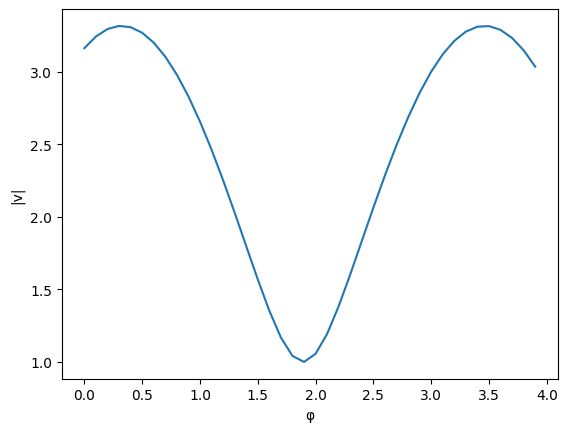

In [48]:
phi = sympy.symbols('phi')

vect = sympy.Matrix([sympy.sin(phi), sympy.cos(phi), sympy.sin(phi) + 3*sympy.cos(phi)])

def func7(phival):
    return vect.norm().subs(phi, phival)

func7np = sympy.lambdify(phi, vect.norm(), modules=['numpy'])

# Построение графика
phi_values = np.arange(0, 4, 0.1)
lengths = func7np(phi_values)

plt.plot(phi_values, lengths)
plt.xlabel("φ")
plt.ylabel("|v|")
plt.show()

### Индивидуальное задание.
Ввести безымянную систему координат XYZ, задать в ней векторы $v_1$ и $v_2$. Построить новую систему координат XYZ1 с именем Name поворотом  XYZ на $\alpha$ по часовой стрелке (или против) относительно оси, определяемой вектором $b$, выразить векторы $v_1$ и $v_2$ в новой системе координат. Найти скалярное и векторное произведение векторов в новой и старой системе координат. Выразить вектор, равный векторному произведению $v_1$ и $v_2$ в старой системе координат через новую систему координат, сравнить с векторным произведением $v_1$ и $v_2$, выраженных в новой системе координат.
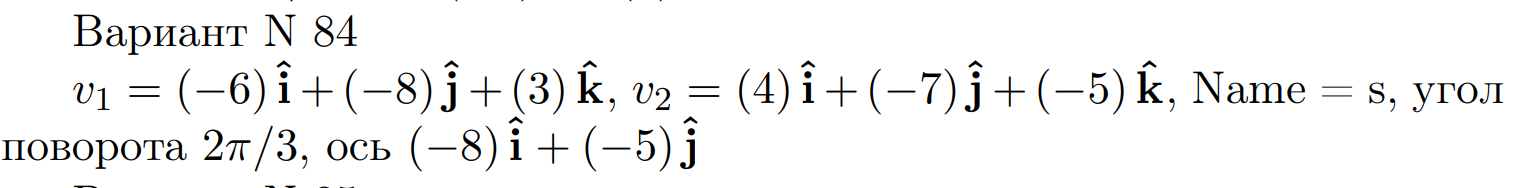

In [59]:
# я устал